# Analyzing the tweets

### import necessary library which contain 
- Json
- pandas
- matplotlib

In [51]:
%matplotlib inline
import re
import json
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
tweets_data_path = 'worldcup2018_twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

## Show the total captured tweet data 

In [53]:
print(len(tweets_data))

6008


In [54]:
tweets = pd.DataFrame()

In [55]:
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))

tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))

tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))



In [170]:
tweets_by_lang = tweets['lang'].value_counts()

In [173]:
tweets_by_lang.head()

en    3894
pt     402
es     335
fr     270
ja     221
Name: lang, dtype: int64

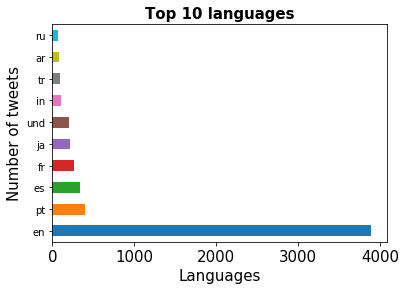

In [207]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 languages', fontsize=15, fontweight='bold')
tw_lang.plot(ax=ax, kind='barh') 

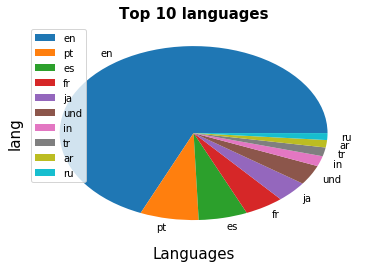

In [56]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:10].plot(ax=ax, kind='pie',legend=True)

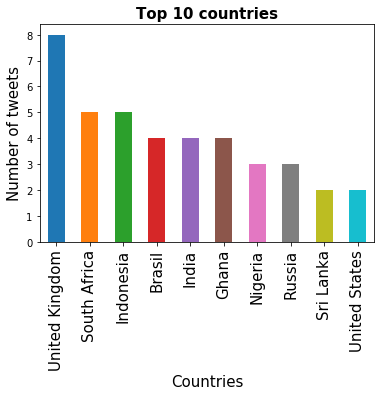

In [57]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 countries', fontsize=15, fontweight='bold')
tweets_by_country[:10].plot(ax=ax, kind='bar')

# Text Mining

In [58]:
import re 

In [59]:
def word_in_text(word,text):
    word = word.lower()
    text = text.lower()
    match = re.search(word,text)
    if match :
        return True
    return False

In [167]:
tweets['Cristiano Ronaldo'] =list(tweets['text'].apply(lambda tweet: word_in_text('Cristiano Ronaldo', tweet)))
tweets['Luis Suarez'] =list(tweets['text'].apply(lambda tweet: word_in_text('Luis Suarez', tweet)))
tweets['Neymar'] =list(tweets['text'].apply(lambda tweet: word_in_text('Neymar', tweet)))
tweets['Lionel Messi'] =list(tweets['text'].apply(lambda tweet: word_in_text('Lionel Messi', tweet)))
tweets['WorldCup'] =list(tweets['text'].apply(lambda tweet: word_in_text('Lionel Messi', tweet)))



In [61]:
CR = tweets['Cristiano Ronaldo'].value_counts()[True]
LS = tweets['Luis Suarez'].value_counts()[True]
NM = tweets['Neymar'].value_counts()[True]
LM = tweets['Lionel Messi'].value_counts()[True]

In [62]:
print("total tweets of Cristiano Ronaldo are", CR,"Tweets") #print total count of Cristiano Ronaldo
print("total tweets ofLuis Suarezare",LS,"Tweets"),#print total count of Luis Suarez
print(NM)#print total count of Neymar
print(LM)#print total count of Lionel Messi


total tweets of Cristiano Ronaldo are 252 Tweets
8
374
668


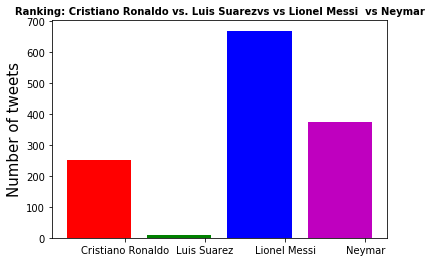

In [182]:
Fb_player = ['Cristiano Ronaldo', 'Luis Suarez', 'Lionel Messi','Neymar']
tweets_by_Fb_player = [CR,LS,LM,NM]
x_pos = list(range(len(Fb_player)))
width = 0.8
fig, ax = plt.subplots()
#ploting graph of tweets_by_Fb_player
pack_color = 'rgbm'
plt.bar(x_pos, tweets_by_Fb_player, width, alpha=1,color=pack_color)
# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: Cristiano Ronaldo vs. Luis Suarezvs vs Lionel Messi  vs Neymar', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(Fb_player)
plt.show()



# Specifying Relevant Tweet text

In [197]:
tweets['FIFA2018'] =list(tweets['text'].apply(lambda tweet: word_in_text('FIFA2018', tweet)))
tweets['World Cup'] =list(tweets['text'].apply(lambda tweet: word_in_text('World Cup', tweet)))


In [198]:
tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('FIFA2018', tweet) or 
                                          word_in_text('World Cup', tweet))                            

In [200]:
print(tweets['relevant'].value_counts())
print(tweets['FIFA2018'].value_counts())
print(tweets['World Cup'].value_counts())

False    5692
True      316
Name: relevant, dtype: int64
False    6005
True        3
Name: FIFA2018, dtype: int64
False    5695
True      313
Name: World Cup, dtype: int64


In [217]:
print(tweets[tweets['relevant'] == True]['Cristiano Ronaldo'].value_counts())
print(tweets[tweets['relevant'] == True]['Luis Suarez'].value_counts())
print(tweets[tweets['relevant'] == True]['Neymar'].value_counts())
print(tweets[tweets['relevant'] == True]['Lionel Messi'].value_counts())

False    305
True      11
Name: Cristiano Ronaldo, dtype: int64
False    314
True       2
Name: Luis Suarez, dtype: int64
False    311
True       5
Name: Neymar, dtype: int64
False    244
True      72
Name: Lionel Messi, dtype: int64
